In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_full = pd.read_csv('../Data/spy_full.csv')
df_month = pd.read_csv('../Data/spy_month.csv')
df_week = pd.read_csv('../Data/spy_week.csv')

In [3]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_month['date'] = pd.to_datetime(df_month['date'])
df_week['date'] = pd.to_datetime(df_week['date'])
start_date = df_full['date'].min()

In [4]:
def get_days_since_start(date):
    return (date - start_date).days / 100
df_full = df_full.assign(index=df_full['date'].apply(get_days_since_start))
df_full = (df_full
           .assign(index_sq=df_full['index'].apply(lambda x:x**2))
           .assign(index_e=df_full['index'].apply(lambda x:np.e**x))
           .assign(index_cube=df_full['index'].apply(lambda x:x**3))
           )
df_month = df_month.assign(index=df_month['date'].apply(get_days_since_start))
df_month = (df_month
            .assign(index_sq=df_month['index'].apply(lambda x:x**2))
            .assign(index_e=df_month['index'].apply(lambda x:np.e**x))
            .assign(index_cube=df_month['index'].apply(lambda x:x**3))
            )
df_week = df_week.assign(index=df_week['date'].apply(get_days_since_start))
df_week = (df_week
           .assign(index_sq=df_week['index'].apply(lambda x:x**2))
           .assign(index_e=df_week['index'].apply(lambda x:np.e**x))
           .assign(index_cube=df_week['index'].apply(lambda x:x**3))
           )

In [5]:
poly = LinearRegression().fit(df_month[['index_sq']], df_month['close_price'])
expo = LinearRegression().fit(df_week[['index_e']], df_week['close_price'])

In [6]:
df_month_test = df_full[~df_full['date'].isin(df_month['date'])]
poly_month_test = poly.predict(df_month_test[['index_sq']])
expo_month_test = expo.predict(df_month_test[['index_e']])
poly_month_mse = mean_squared_error(df_month_test['close_price'], poly_month_test)
expo_month_mse = mean_squared_error(df_month_test['close_price'], expo_month_test)
print(f'Poly MSE: {poly_month_mse}\n'
      f'Expo MSE: {expo_month_mse}')

Poly MSE: 1859.7914566607935
Expo MSE: 13554.257024094946


In [7]:
df_week_test = df_full[~df_full['date'].isin(df_week['date'])]
poly_week_test = poly.predict(df_week_test[['index_sq']])
expo_week_test = expo.predict(df_week_test[['index_e']])
poly_week_mse = mean_squared_error(df_week_test['close_price'], poly_week_test)
expo_week_mse = mean_squared_error(df_week_test['close_price'], expo_week_test)
print(f'Poly MSE: {poly_week_mse}\n'
      f'Expo MSE: {expo_week_mse}')

Poly MSE: 1860.956540393641
Expo MSE: 13580.127069406675


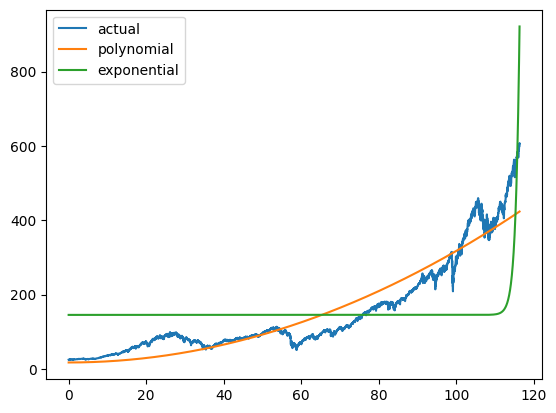

In [8]:
plt.plot(df_month_test['index'],df_month_test['close_price'],label='actual')
plt.plot(df_month_test['index'],poly_month_test,label='polynomial')
plt.plot(df_month_test['index'],expo_month_test,label='exponential')
plt.legend()
plt.show()

In [9]:
poly_2 = poly
poly_3 = LinearRegression().fit(df_month[['index_cube']], df_month['close_price'])
poly_2_3 = LinearRegression().fit(df_month[['index_sq','index_cube']],df_month['close_price'])
poly_3_test = poly_3.predict(df_month_test[['index_cube']])
poly_2_3_test = poly_2_3.predict(df_month_test[['index_sq','index_cube']])
poly_3_mse = mean_squared_error(df_month_test['close_price'], poly_3_test)
poly_2_3_mse = mean_squared_error(df_month_test['close_price'], poly_2_3_test)
print(f'Poly squared MSE: {poly_month_mse}\n'
      f'Poly cubed MSE: {poly_3_mse}\n'
      f'Poly squared+cubed MSE: {poly_2_3_mse}')

Poly squared MSE: 1859.7914566607935
Poly cubed MSE: 829.5833355400493
Poly squared+cubed MSE: 616.1797483978379


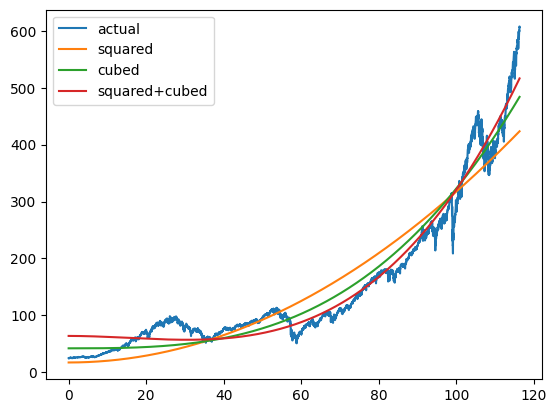

In [10]:
plt.plot(df_month_test['index'],df_month_test['close_price'],label='actual')
plt.plot(df_month_test['index'],poly_month_test,label='squared')
plt.plot(df_month_test['index'],poly_3_test,label='cubed')
plt.plot(df_month_test['index'],poly_2_3_test,label='squared+cubed')
plt.legend()
plt.show()

In [11]:
future_days = [*range(24000)]
future_days = np.array(list(map(lambda x:x/100, future_days))).reshape(-1,1)
X = pd.DataFrame(future_days,columns=['index'])
X = (X
    .assign(index_sq=X['index'].apply(lambda x:x**2))
    .assign(index_cube=X['index'].apply(lambda x:x**3))
    )

In [12]:
poly_2_future = poly_2.predict(X[['index_sq']])
poly_3_future = poly_3.predict(X[['index_cube']])
poly_2_3_future = poly_2_3.predict(X[['index_sq','index_cube']])
print(f'Squared predicted value: {poly_2_future[-1]:.0f}\n'
      f'Cubed predicted value: {poly_3_future[-1]:.0f}\n'
      f'Squared+cubed predicted value: {poly_2_3_future[-1]:.0f}')

Squared predicted value: 1747
Cubed predicted value: 3922
Squared+cubed predicted value: 5368


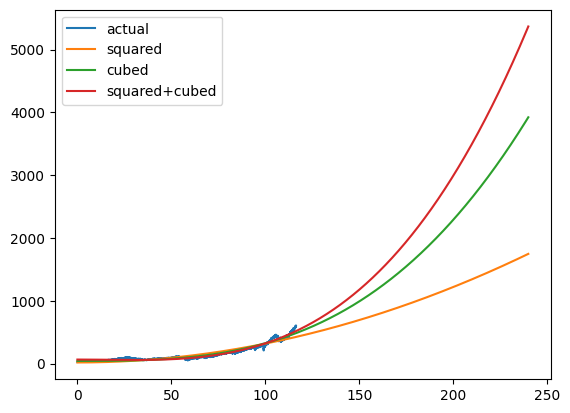

In [13]:
plt.plot(df_month_test['index'],df_month_test['close_price'],label='actual')
plt.plot(future_days,poly_2_future,label='squared')
plt.plot(future_days,poly_3_future,label='cubed')
plt.plot(future_days,poly_2_3_future,label='squared+cubed')
plt.legend()
plt.show()